# RNN средствами Numpy

В этом блокноте мы рассмотрим построение модели простейшей рекуррентной нейронной сети средствами бибилиотеки Numpy.

В качестве иллюстрации рассмотрим задачу выбора имени для ребенка, то есть создадим модель, способную генерировать человеческие имена.

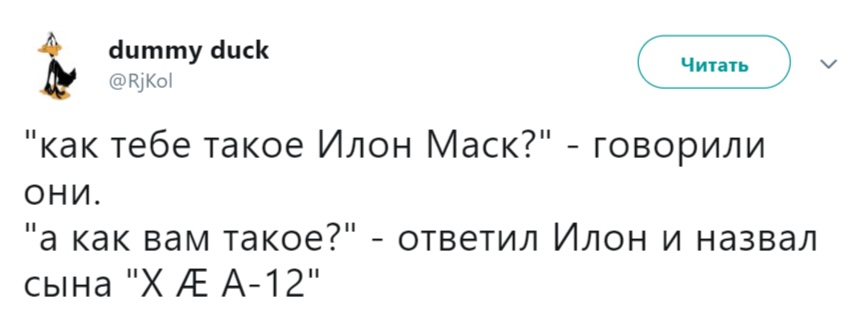

# Краткое напоминание (Simple RNN)

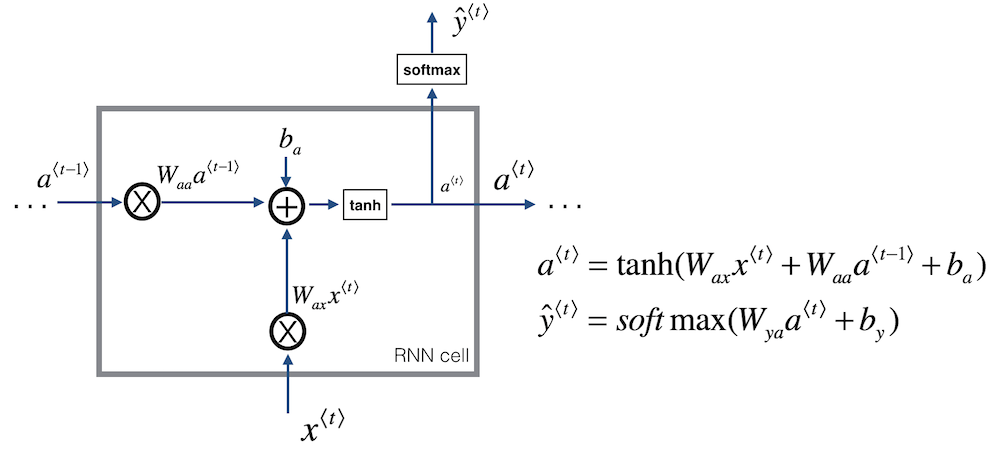

# Подготовка данных

Загрузим данные и подготовим файлы


*   `names.txt` — файл с данными (более 50 тыс. имен)
*   `RNN.py` — основной файл, содержащий описание класса модели RNN
*   `RNN_utils.py` — вспомогательные модули



In [14]:
!git clone https://github.com/dvolchek/RNN_model_numpy.git
import shutil
shutil.copyfile('/content/RNN_model_numpy/rnn/RNN_utils.py', 'RNN_utils.py')
shutil.copyfile('/content/RNN_model_numpy/rnn/RNN.py', 'RNN.py')
shutil.copyfile('/content/RNN_model_numpy/rnn/names.txt', 'names.txt')

fatal: destination path 'RNN_model_numpy' already exists and is not an empty directory.


'names.txt'

In [15]:
import numpy as np
from RNN import RNNModel
from RNN_utils import SGD

Предварительная обработка данных

In [16]:
np.random.seed(1)

# Считываем данные
person_names = open('names.txt', 'r').read()
person_names= person_names.lower().strip()

# Формируем алфавит
characters = list(set(person_names))

# Словари перевода символов в индексы и обратно
character_to_index = {character:index for index,character in enumerate(sorted(characters))}
index_to_character = {index:character for index,character in enumerate(sorted(characters))}

# Формируем список имен и перемешиваем его
person_names = person_names.split('\n')
np.random.shuffle(person_names)

print('Всего имен: ', len(person_names))
print('Примеры имен: ', person_names[:5])
print('Словарь символ/индекс: ', character_to_index)

Всего имен:  51529
Примеры имен:  ['ракип', 'айро', 'катаюн', 'микаиль', 'жанриэта']
Словарь символ/индекс:  {'\n': 0, 'а': 1, 'б': 2, 'в': 3, 'г': 4, 'д': 5, 'е': 6, 'ж': 7, 'з': 8, 'и': 9, 'й': 10, 'к': 11, 'л': 12, 'м': 13, 'н': 14, 'о': 15, 'п': 16, 'р': 17, 'с': 18, 'т': 19, 'у': 20, 'ф': 21, 'х': 22, 'ц': 23, 'ч': 24, 'ш': 25, 'щ': 26, 'ъ': 27, 'ы': 28, 'ь': 29, 'э': 30, 'ю': 31, 'я': 32, 'ё': 33}


Имена есть, словарь сформирован. А как будем производить генерацию? То есть, что мы хотим, чтобы делала модель? Ничего гениального: научим модель генерировать следующий символ на основе предыдущего.

# Задача 1

Определим формат обучающих данных, которые будет получать модель. В качестве примера рассмотрим кодирование имени `даня`. Согласно созданному ранее словарю этой строке будет соответствовать последовательность
$$
[5,1,14,32].
$$
Кроме того, в качестве первого символа имеет смысл добавить некоторое значение, которое будет отвечать за начало имени, пусть это будет значение `None`. Итого получим последовательность
$$
[\text{None},5,1,14,32].
$$

В качестве откликов тогда будут выступать те символы, которые модель должна предсказать + символ окончания имени `\n`. То есть

*   `None` $⟶$ `5`
*   `5` $⟶$ `1`
*   $\vdots$
*   `32` $⟶$ `\n`

После этого полученные списки будем кодировать при помощи `one-hot`, считая, что значению `None` соответствуют все нули.


**Задача:** реализуйте функцию `encode_data(name, alphabet_size)`, которая на вход принимает текстовую строку, соответствующую имени, и размер алфавита, производит описанные выше преобразования и возвращает 2 массива размерности `(len(name)+1, alphabet_size, 1)`: one-hot кодированные признаки и отклики.


In [17]:
name = 'даня'

alphabet_size = len(character_to_index.keys())

def encode_data(name, alphabet_size):

  # <ENTER YOUR CODE>
  pass


In [18]:
# @title Решение
def encode_data(name, alphabet_size):
  # Добавляем служебные символы в начало и в конец
  encoded_name_extended = [None] + [character_to_index[ch] for ch in name] + [character_to_index["\n"]]

  result = []
  # Ван хотим все
  for index, num in enumerate(encoded_name_extended):
      one_hot = np.zeros((alphabet_size,1))
      if (num != None):
          one_hot[num] = 1
      result.append(one_hot)
  result = np.array(result)
  # Обрезаем с нужной стороны для X и Y и возвращаем
  return result[:-1], result[1:]


In [19]:
X,Y = encode_data(name, alphabet_size)
assert X.shape == Y.shape == (5,34,1)
assert X[0].sum() == 0
assert X[1,5] == Y[0,5] == X[2,1] == Y[1,1] == X[3,14] == Y[2,14] == X[4,32] == Y[3,32] == 1
assert X.sum() == Y[:-1].sum() == 4

# Прототипирование модели

Моделировать нашу сеть будем при помощи класса `RNNModel`

```
class RNNModel:
    def __init__(self, input_dim, output_dim, hidden_dim):
        """
        Инициализация параметров ячейки RNN
        """
    def forward(self, input_X):
        """
        Прямой проход по сети
        """      
    def loss(self, Y):
        """
        Вычисление лосса (Кросс энтропия)
        """
    def backward(self):  
        """
        Обратное распространение
        """
    def clip(self, clip_value):
        """
        Клиппинг градиентов во избежание взрывов
        """
    def optimize(self, method):
        """
        Обновление параметров модели в соответствии с методом оптимизации
        """    
    def generate_names(self, index_to_character):
        """
        Генерация имен
        """
    def _initialize_parameters(self, input_dim, output_dim, hidden_dim):
        """
        Инициализация параметров
        """
    def _define_gradients(self):
        """
        Инициализация градиентов
        """
```
Не стоит пугаться: большая часть уже описана. В качестве практики рассмотрим и дополним лишь некоторые методы.

## Задача 2

Опишем метод `_initialize_parameters()` сначала в виде отдельной функции (так удобнее для отладки), а затем переопределим класс `RNNModel`. На вход наша функция будет принимать следующие параметры:


*   `input_dim` == `output_dim` -- размер словаря
*   `hidden_dim` -- размер скрытого слоя

**Примечание:** в данном случае под размерами понимаются целые числа на основе которых определяются размерности соответствующих матриц весов и смещений.

Функция должна инициализировать и возвращать матрицы весов и смещений в следующей последовательности `Wya, Wax, Waa, by, b`.

Для инициализации **весов** на практике хорошо себя зарекомендовала инициализация весов при помощи `np.random.randn() / np.sqrt(input_dim)`.

Проблема состоит в том, что дисперсия случайных величин растёт с числом нейронов. Чтобы избежать этого, можно масштабировать веса, поделив их на корень из количества входов. Это гарантирует, что все нейроны сети изначально будут иметь примерно одинаковое выходное распределение.

**Векторы смещений** будем инициализоровать нулями при помощи `np.zeros()`, так, чтобы каждый элемент вектора смещения тоже был массивом.

In [20]:
np.random.seed(1)

input_dim = alphabet_size
output_dim = alphabet_size

hidden_dim = 100

def _initialize_parameters(input_dim, output_dim, hidden_dim):

  dens = np.sqrt(input_dim)

  # <ENTER YOUR CODE>
  pass

  return Wya, Wax, Waa, by, b


In [21]:
# @title Решение
def _initialize_parameters(input_dim, output_dim, hidden_dim):
  dens = np.sqrt(input_dim)
  Wya = np.random.randn(output_dim, hidden_dim) / dens
  Wax = np.random.randn(hidden_dim, input_dim) / dens
  Waa = np.random.randn(hidden_dim, hidden_dim) / dens
  by = np.zeros((output_dim, 1))
  b = np.zeros((hidden_dim, 1))
  return Wya, Wax, Waa, by, b

In [22]:
Wya, Wax, Waa, by, b = _initialize_parameters(input_dim, output_dim, hidden_dim)
assert Wax.shape == (100,34) and Waa.shape == (100,100) and Wya.shape == (34,100) and by.shape == (34,1) and b.shape == (100,1)

Теперь переопределим метод `_initialize_parameters()` непосредственно в классе `RNNModel`

In [23]:
class RNNModel(RNNModel):
  def _initialize_parameters(self, input_dim, output_dim, hidden_dim):
    # <COPY YOUR CODE>
    pass
    return Wya, Wax, Waa, by, b

In [24]:
# @title Решение

class RNNModel(RNNModel):
  def _initialize_parameters(self, input_dim, output_dim, hidden_dim):
    dens = np.sqrt(input_dim)
    Wya = np.random.randn(output_dim, hidden_dim) / dens
    Wax = np.random.randn(hidden_dim, input_dim) / dens
    Waa = np.random.randn(hidden_dim, hidden_dim) / dens
    by = np.zeros((output_dim, 1))
    b = np.zeros((hidden_dim, 1))
    return Wya, Wax, Waa, by, b

# Моделирование

Гиперпараметры модели, инициализация

In [25]:
num_epochs = 40000

# Инициализируем модель
model = RNNModel(input_dim, output_dim, hidden_dim)
optim = SGD(lr=0.001)
costs = []

Обучение

In [26]:
np.random.seed(1)

from tqdm.notebook import tqdm
# Обучение
for epoch in tqdm(range(num_epochs+1)):

    # Берем одно имя и формируем данные для обучения

    index = epoch % len(person_names)
    name = person_names[index]
    X,Y = encode_data(name, alphabet_size)

    # Последовательность шагов модели
    model.forward(X)
    cost = model.loss(Y)
    model.backward()
    # Клиппинг градиентов
    model.clip(clip_value=1)
    # Оптимизация
    model.optimize(optim)

    if epoch % 10000 == 0:
        print ("Loss после эпохи %d: %f" % (epoch, cost))
        costs.append(cost)

        print('Сгенерированные имена:', '\n')
        names = [model.generate_names(index_to_character).replace("\n", "") for i in range(4)]
        print('  |  '.join(names))
        print('--------------------------------------')

  0%|          | 0/40001 [00:00<?, ?it/s]

Loss после эпохи 0: 19.134954
Сгенерированные имена: 

нч  |  йедвлмпофзьбынп  |  геъёиуэщвбещвою  |  сцйччаъёхишзоэи
--------------------------------------
Loss после эпохи 10000: 33.326475
Сгенерированные имена: 

ваана  |  канани  |  ержанейтап  |  арегханар
--------------------------------------
Loss после эпохи 20000: 15.009488
Сгенерированные имена: 

светия  |  махина  |  ци  |  мантета
--------------------------------------
Loss после эпохи 30000: 16.776235
Сгенерированные имена: 

шоявата  |  софод  |  абдулиш  |  виян
--------------------------------------
Loss после эпохи 40000: 10.532852
Сгенерированные имена: 

саситин  |  аваддин  |  ачлавижат  |  берта
--------------------------------------


# Задача 3

А как происходит генерация имени после обучения модели? Продумайте алгоритм (непосредственно в коде или в виде псевдокода/на бумаге/в голове). Определите 5 наиболее вероятных букв для начала имени по мнению модели.


Сравните ваш алгоритм с метдом `generate_names()` класса `RNNModel`.

In [28]:
model.generate_names(index_to_character)

'джоре\n'